In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
c_path = "./data/"
v_file = ("Enexis_kleinverbruiksgegevens_01012010",                                          # 0
          "Enexis_kleinverbruiksgegevens_01012011",                                          # 1
          "Enexis_kleinverbruiksgegevens_01012012",                                          # 2
          "Enexis_kleinverbruiksgegevens_01012013",                                          # 3
          "Enexis_kleinverbruiksgegevens_01012014",                                          # 4
          "Enexis_kleinverbruiksgegevens_01012015",                                          # 5
          "Enexis_kleinverbruiksgegevens_01012016",                                          # 6
          "Enexis_kleinverbruiksgegevens_01012017",                                          # 7
          "Enexis_kleinverbruiksgegevens_01012018",                                          # 8
          "Enexis_kleinverbruiksgegevens_01012019",                                          # 9
          "Enexis_kleinverbruiksgegevens_01012020",                                          # 10
          "Enexis_kleinverbruiksgegevens_01012021",                                          # 11
          "Enexis_kleinverbruiksgegevens_01012022")                                          # 12

N_cities = 5          

In [3]:
i = 0
c_decimal = ','
df     = pd.read_csv(filepath_or_buffer = c_path + v_file[i] + ".csv",
                         sep                = ';',
                         decimal            = c_decimal,
                         encoding           = 'unicode_escape')

In [4]:
df['Year'] = v_file[i][-4:]

In [5]:
df.head()

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,Year
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100,16,100,NaN,NaN,4282,25,0.0,2010
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100,11,100,NaN,NaN,5113,10,0.0,2010
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100,30,100,NaN,NaN,4809,34,0.0,2010
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100,21,100,NaN,NaN,5015,44,0.0,2010
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100,12,100,NaN,NaN,3074,22,0.0,2010


In [6]:
for i in range(len(v_file)):
    df_new = pd.read_csv(filepath_or_buffer = c_path + v_file[i] + ".csv",
                         sep                = ';',
                         decimal            = c_decimal,
                         encoding           = 'unicode_escape')
    df_new['Year'] = v_file[i][-4:]
    df = pd.concat([df, df_new], axis = 0)

In [7]:
df.shape

(2989620, 20)

In [8]:
df.head()

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,Year,SJA_GEMIDDELD,SJA_LAAG_TARIEF_PERC
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100.0,16,100,NaN,NaN,4282.0,25.0,0.0,2010,NaN,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100.0,11,100,NaN,NaN,5113.0,10.0,0.0,2010,NaN,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100.0,30,100,NaN,NaN,4809.0,34.0,0.0,2010,NaN,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100.0,21,100,NaN,NaN,5015.0,44.0,0.0,2010,NaN,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100.0,12,100,NaN,NaN,3074.0,22.0,0.0,2010,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989620 entries, 0 to 235940
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NETBEHEERDER            object 
 1   NETGEBIED               object 
 2   STRAATNAAM              object 
 3   POSTCODE_VAN            object 
 4   POSTCODE_TOT            object 
 5   WOONPLAATS              object 
 6   LANDCODE                object 
 7   PRODUCTSOORT            object 
 8   VERBRUIKSSEGMENT        object 
 9   LEVERINGSRICHTING_PERC  float64
 10  AANSLUITINGEN_AANTAL    int64  
 11  FYSIEKE_STATUS_PERC     int64  
 12  SOORT_AANSLUITING_PERC  float64
 13  SOORT_AANSLUITING       object 
 14  SJV_GEMIDDELD           float64
 15  SJV_LAAG_TARIEF_PERC    float64
 16  SLIMME_METER_PERC       float64
 17  Year                    object 
 18  SJA_GEMIDDELD           float64
 19  SJA_LAAG_TARIEF_PERC    float64
dtypes: float64(7), int64(2), object(11)
memory usage: 479.0+ MB


In [10]:
df['SJV_GEMIDDELD'] = df['SJV_GEMIDDELD'].astype(float)

In [11]:
df['Year'] = df['Year'].astype(int)

In [12]:
df['PRODUCTSOORT'] = df['PRODUCTSOORT'].astype('category')

In [13]:
df['VERBRUIKSSEGMENT'] = df['VERBRUIKSSEGMENT'].astype('category')

In [14]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NETBEHEERDER,2989620,2,Enexis B.V.,2668896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NETGEBIED,2989620,1,ENEXIS,2989620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STRAATNAAM,2989620,57106,Kerkstraat,10685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSTCODE_VAN,2989620,255223,5663 PE,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSTCODE_TOT,2989620,251568,5012 JE,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WOONPLAATS,2989620,1375,GRONINGEN,123869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LANDCODE,2989620,1,NL,2989620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTSOORT,2989620,2,ELK,1624555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VERBRUIKSSEGMENT,2989620,1,KVB,2989620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LEVERINGSRICHTING_PERC,2987362.0,NaN,NaN,NaN,95.968808,10.757389,0.0,100.0,100.0,100.0,100.0


In [15]:
df['Year'].value_counts()

2010    380956
2021    235942
2022    235941
2020    235655
2019    235241
2018    234570
2017    218237
2015    208934
2014    208333
2013    207671
2012    201317
2016    195006
2011    191817
Name: Year, dtype: int64

In [16]:
df[df['PRODUCTSOORT'] == 'GAS']['SJV_LAAG_TARIEF_PERC'].value_counts()

0.0       1254638
2225.0          1
1435.0          1
Name: SJV_LAAG_TARIEF_PERC, dtype: int64

The two rows with `SJV_LAAG_TARIEF_PERC values` other than 0 are evidently mistakes. We will replace them with 0.

In [17]:
df.loc[df['SJV_LAAG_TARIEF_PERC'] >100, 'SJV_LAAG_TARIEF_PERC'] = 0

In [18]:
df[df['PRODUCTSOORT'] == 'GAS']['SLIMME_METER_PERC'].value_counts()

Series([], Name: SLIMME_METER_PERC, dtype: int64)

There are no values in column `SLIMME_METER_PERC` for GAS

In [19]:
df[df['PRODUCTSOORT'] == 'GAS']['LEVERINGSRICHTING_PERC'].value_counts()

100.0    1365063
99.0           2
Name: LEVERINGSRICHTING_PERC, dtype: int64

The column `LEVERINGSRICHTING_PERC` is not relevant for GAS, almost all values are 100%

In [20]:
df['FYSIEKE_STATUS_PERC'].value_counts()

100    2989620
Name: FYSIEKE_STATUS_PERC, dtype: int64

All values in `FYSIEKE_STATUS_PERC` column are equal to 100, this column can be removed

We observe in year 2022 columns named `SJA_GEMIDDELD` and `SJA_LAAG_TARIEF_PERC`, in place of `SJV_GEMIDDELD` and `SJV_LAAG_TARIEF_PERC`. Let's investigate.

In [21]:
df[df['SJV_GEMIDDELD'].isna()]['Year'].value_counts()

2022    235941
Name: Year, dtype: int64

In [22]:
df[df['SJA_GEMIDDELD'].isna()]['Year'].value_counts()

2010    380956
2021    235942
2020    235655
2019    235241
2018    234570
2017    218237
2015    208934
2014    208333
2013    207671
2012    201317
2016    195006
2011    191817
Name: Year, dtype: int64

It seems that in year 2022 SJA started to be used in place of SJV

Let's provisionally make SJV_GEMIDDELD in 2022 equal to SJA_GEMIDDELD and delete SJA_GEMIDDELD, and sililarly for SJA_LAAG_TARIEF_PERC

In [23]:
df['SJV_GEMIDDELD'].fillna(df['SJA_GEMIDDELD'], inplace=True)

In [24]:
df['SJV_LAAG_TARIEF_PERC'].fillna(df['SJA_LAAG_TARIEF_PERC'], inplace=True)

In [25]:
df = df.drop(columns = ['SJA_GEMIDDELD', 'SJA_LAAG_TARIEF_PERC'], axis = 1)

Let's also drop columns NETBEHEERDER and NETGEBIED, which are irrelevant (the only value is Enexis), as well as LANDCODE (alwys NL) and FYSIEKE_STATUS_PERC (always 100%)

In [26]:
df = df.drop(columns = ['NETBEHEERDER', 'NETGEBIED', 'LANDCODE', 'FYSIEKE_STATUS_PERC'], axis = 1)

Let's check for missing values

In [27]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

SLIMME_METER_PERC         1365065
SOORT_AANSLUITING          381025
SOORT_AANSLUITING_PERC     380956
LEVERINGSRICHTING_PERC       2258
dtype: int64

In [28]:
df['SLIMME_METER_PERC'] = df['SLIMME_METER_PERC'].fillna(-1)

In [29]:
df[df['SLIMME_METER_PERC'] == 0].count()

STRAATNAAM                528819
POSTCODE_VAN              528819
POSTCODE_TOT              528819
WOONPLAATS                528819
PRODUCTSOORT              528819
VERBRUIKSSEGMENT          528819
LEVERINGSRICHTING_PERC    528818
AANSLUITINGEN_AANTAL      528819
SOORT_AANSLUITING_PERC    315789
SOORT_AANSLUITING         315789
SJV_GEMIDDELD             528819
SJV_LAAG_TARIEF_PERC      528819
SLIMME_METER_PERC         528819
Year                      528819
dtype: int64

Let's introduce new column for a 4-digit post code

In [31]:
df['POSTCODE4'] = df['POSTCODE_VAN'].map(lambda x: x[:-2])

In [32]:
df['POSTCODE4'] = df['POSTCODE4'].replace(' ','')

In [33]:
df['POSTCODE4']

0          4251
1          4251
2          4251
3          4251
4          4251
          ...  
235936    9998 
235937    9999 
235938    9999 
235939    9999 
235940    9999 
Name: POSTCODE4, Length: 2989620, dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989620 entries, 0 to 235940
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   STRAATNAAM              object  
 1   POSTCODE_VAN            object  
 2   POSTCODE_TOT            object  
 3   WOONPLAATS              object  
 4   PRODUCTSOORT            category
 5   VERBRUIKSSEGMENT        category
 6   LEVERINGSRICHTING_PERC  float64 
 7   AANSLUITINGEN_AANTAL    int64   
 8   SOORT_AANSLUITING_PERC  float64 
 9   SOORT_AANSLUITING       object  
 10  SJV_GEMIDDELD           float64 
 11  SJV_LAAG_TARIEF_PERC    float64 
 12  SLIMME_METER_PERC       float64 
 13  Year                    int32   
 14  POSTCODE4               object  
dtypes: category(2), float64(5), int32(1), int64(1), object(6)
memory usage: 313.6+ MB


In [34]:
for col in df.columns:
    print(df[col].value_counts())

Kerkstraat        10685
Hoofdstraat       10421
Molenstraat        8754
Schoolstraat       8262
Dorpsstraat        7951
                  ...  
Mastboersweg          1
de Arntshoff          1
Burghoffweg           1
De Schoolakker        1
Ikkinksweg            1
Name: STRAATNAAM, Length: 57106, dtype: int64
5663 PE    14
4762AT     14
5912ET     14
8281 MA    14
5258 TB    14
           ..
5513PG      1
5731ZK      1
5283 PW     1
7623PE      1
9979 XW     1
Name: POSTCODE_VAN, Length: 255223, dtype: int64
5012 JE    14
5854 EK    14
7534 ZX    14
9977 RZ    14
4624JG     14
           ..
5254 GB     1
5581SN      1
7793 HR     1
5388 PC     1
9613 CS     1
Name: POSTCODE_TOT, Length: 251568, dtype: int64
GRONINGEN                  123869
TILBURG                     85464
ENSCHEDE                    83188
ZWOLLE                      73385
BREDA                       68026
                            ...  
STARTENHUIZEN EEMSDELTA         2
OOSTEREND TERSCHELLING          2
MARIAHOOP   

Now, let's separate the datasets for electricity and for gas

In [35]:
dfg = df[df['PRODUCTSOORT'] == 'GAS']

In [36]:
dfe = df[df['PRODUCTSOORT'] == 'ELK']

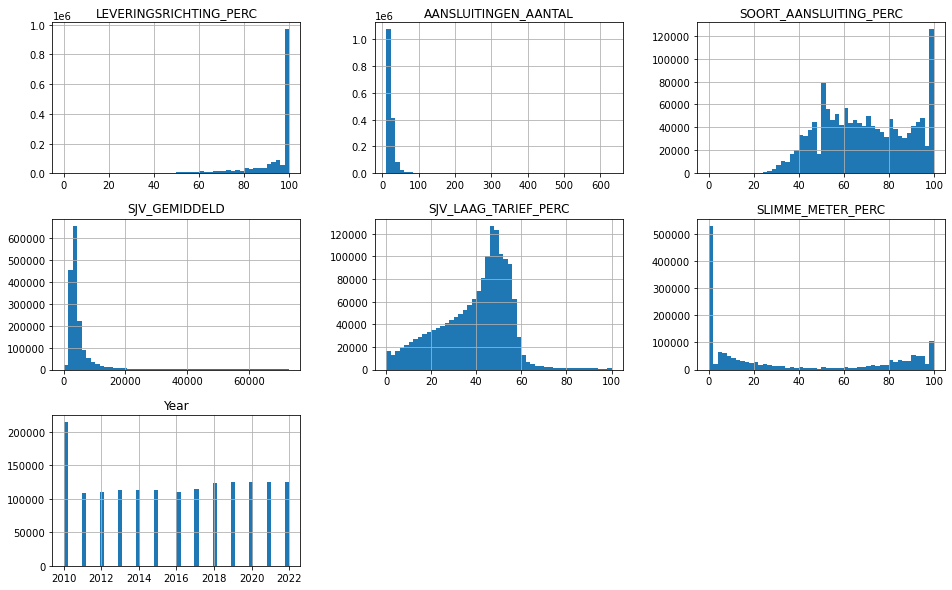

In [37]:
dfe.hist(bins=50, figsize=(16,10));

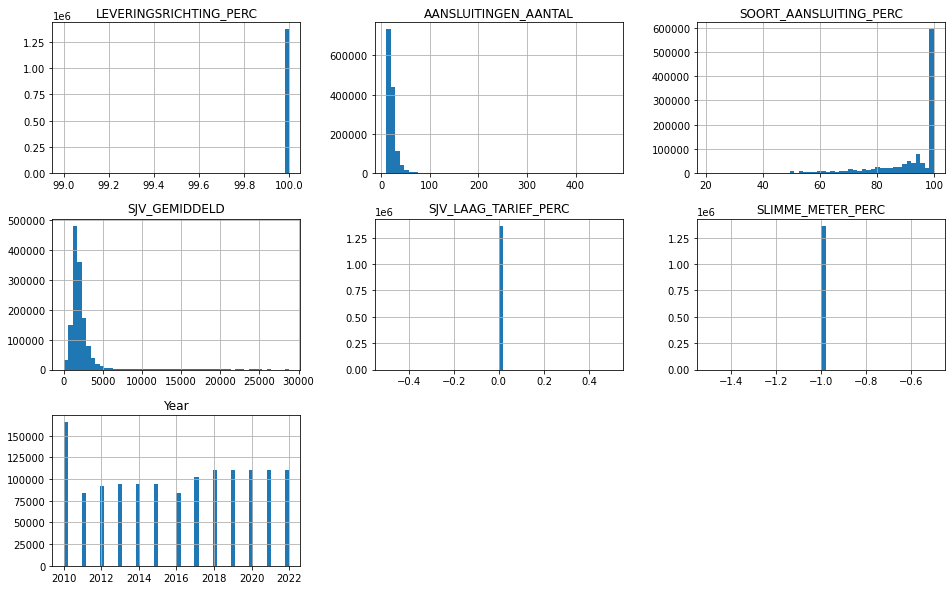

In [38]:
dfg.hist(bins=50, figsize=(16,10));

In [41]:
cities = df['WOONPLAATS'].value_counts().nlargest(N_cities).index  #selection of N biggest cities

In [42]:
dfs = df[df['WOONPLAATS'].isin(cities)] 

In [43]:
dfs['WOONPLAATS'].value_counts()

GRONINGEN    123869
TILBURG       85464
ENSCHEDE      83188
ZWOLLE        73385
BREDA         68026
Name: WOONPLAATS, dtype: int64

In [44]:
SJV_gas = dfs[dfs['PRODUCTSOORT'] == 'GAS'].groupby(['WOONPLAATS', 'Year']).mean()[['SJV_GEMIDDELD']]

In [47]:
SJV_gas.head()

SJV_GEMIDDELD
WOONPLAATS Year               
BREDA      2010    2035.221283
           2011    2031.543381
           2012    1933.037701
           2013    1884.312614
           2014    1858.318451

In [48]:
SJV_gas = SJV_gas.rename(columns={'SJV_GEMIDDELD': 'SJV_GAS_GEMIDDELD'})

In [49]:
SJV_gas.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65 entries, ('BREDA', 2010) to ('ZWOLLE', 2022)
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SJV_GAS_GEMIDDELD  65 non-null     float64
dtypes: float64(1)
memory usage: 906.0+ bytes


In [50]:
SJV_elk = dfs[dfs['PRODUCTSOORT'] == 'ELK'].groupby(['WOONPLAATS', 'Year']).mean()[['SJV_GEMIDDELD']]

In [51]:
SJV_elk.head()

SJV_GEMIDDELD
WOONPLAATS Year               
BREDA      2010    4788.275435
           2011    4766.005749
           2012    4786.615297
           2013    4708.495461
           2014    4658.185548

In [52]:
SJV_elk = SJV_elk.rename(columns={'SJV_GEMIDDELD': 'SJV_ELK_GEMIDDELD'})

In [53]:
SJV_elk.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65 entries, ('BREDA', 2010) to ('ZWOLLE', 2022)
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SJV_ELK_GEMIDDELD  65 non-null     float64
dtypes: float64(1)
memory usage: 906.0+ bytes


In [54]:
#features = ['LEVERINGSRICHTING_PERC', 'AANSLUITINGEN_AANTAL', 'SJV_LAAG_TARIEF_PERC', 'SLIMME_METER_PERC']

In [55]:
features = ['LEVERINGSRICHTING_PERC', 'SLIMME_METER_PERC']

In [56]:
data = dfe[dfe['WOONPLAATS'].isin(cities)].groupby(['WOONPLAATS', 'Year']).mean()[features]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65 entries, ('BREDA', 2010) to ('ZWOLLE', 2022)
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LEVERINGSRICHTING_PERC  65 non-null     float64
 1   SLIMME_METER_PERC       65 non-null     float64
dtypes: float64(2)
memory usage: 1.4+ KB


In [58]:
data = pd.merge(data, SJV_elk, how = 'outer', on = ['WOONPLAATS', 'Year'])

In [59]:
data = pd.merge(data, SJV_gas, how = 'outer', on = ['WOONPLAATS', 'Year'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65 entries, ('BREDA', 2010) to ('ZWOLLE', 2022)
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LEVERINGSRICHTING_PERC  65 non-null     float64
 1   SLIMME_METER_PERC       65 non-null     float64
 2   SJV_ELK_GEMIDDELD       65 non-null     float64
 3   SJV_GAS_GEMIDDELD       65 non-null     float64
dtypes: float64(4)
memory usage: 3.1+ KB


In [62]:
data['SJV_ELK_rel'] = data['SJV_ELK_GEMIDDELD']

In [63]:
data['SJV_GAS_rel'] = data['SJV_GAS_GEMIDDELD']

In [64]:
data.index.get_level_values(level = 0).unique()

Index(['BREDA', 'ENSCHEDE', 'GRONINGEN', 'TILBURG', 'ZWOLLE'], dtype='object', name='WOONPLAATS')

In [65]:
for (i,j) in data.index:
    data.loc[(i,j)]['SJV_ELK_rel'] = data.loc[(i,j)]['SJV_ELK_GEMIDDELD'] / data.loc[(i,2010)]['SJV_ELK_GEMIDDELD'] * 100

In [66]:
for (i,j) in data.index:
    data.loc[(i,j)]['SJV_GAS_rel'] = data.loc[(i,j)]['SJV_GAS_GEMIDDELD'] / data.loc[(i,2010)]['SJV_GAS_GEMIDDELD'] * 100

In [67]:
i = 'BREDA'
j = 2011
data.loc[(i,j)]

LEVERINGSRICHTING_PERC      99.980836
SLIMME_METER_PERC            0.589881
SJV_ELK_GEMIDDELD         4766.005749
SJV_GAS_GEMIDDELD         2031.543381
SJV_ELK_rel                 99.534912
SJV_GAS_rel                 99.819287
Name: (BREDA, 2011), dtype: float64

In [68]:
data.head()

LEVERINGSRICHTING_PERC  SLIMME_METER_PERC  SJV_ELK_GEMIDDELD  \
WOONPLAATS Year                                                                 
BREDA      2010               99.991103           0.005029        4788.275435   
           2011               99.980836           0.589881        4766.005749   
           2012               99.919711           2.553272        4786.615297   
           2013               99.573752           4.908472        4708.495461   
           2014               99.108393           8.861122        4658.185548   

                 SJV_GAS_GEMIDDELD  SJV_ELK_rel  SJV_GAS_rel  
WOONPLAATS Year                                               
BREDA      2010        2035.221283   100.000000   100.000000  
           2011        2031.543381    99.534912    99.819287  
           2012        1933.037701    99.965329    94.979240  
           2013        1884.312614    98.333847    92.585147  
           2014        1858.318451    97.283158    91.307931

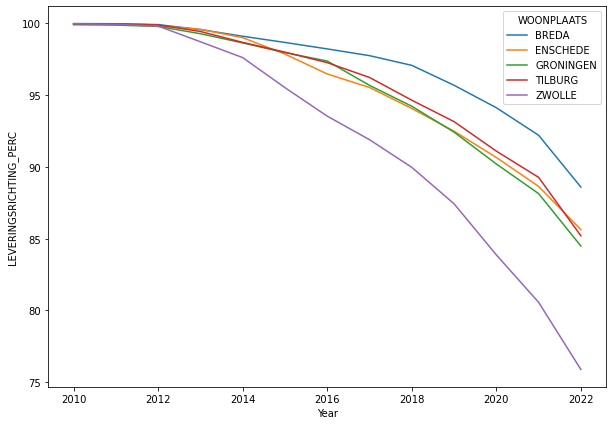

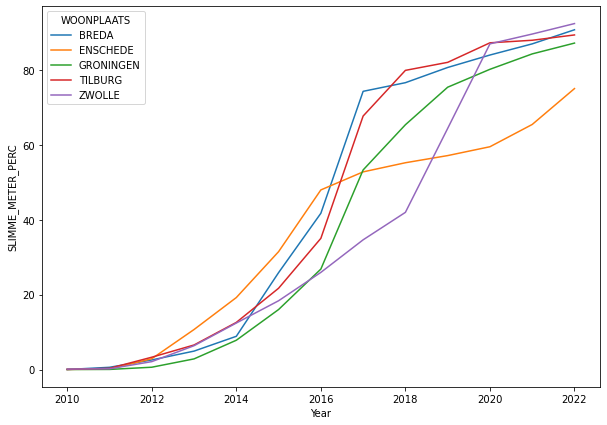

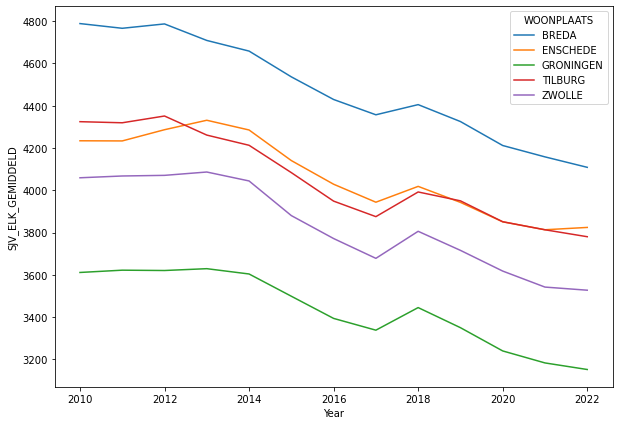

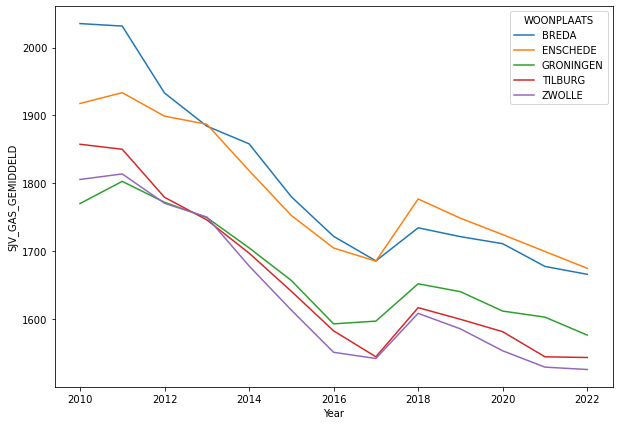

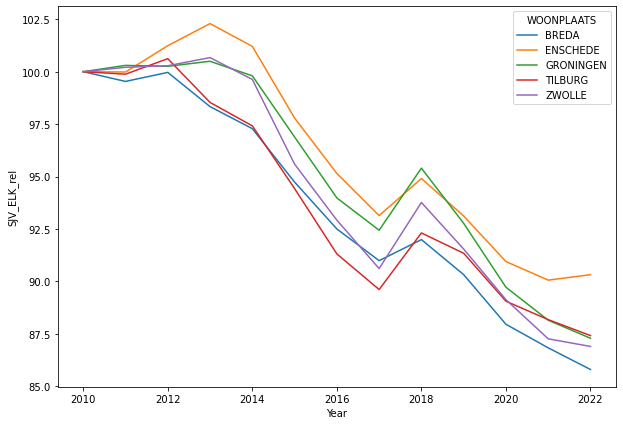

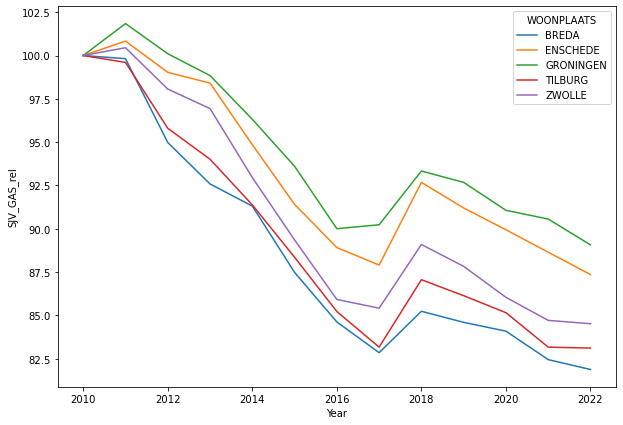

In [70]:
for col in data.columns:
    plt.figure(figsize = (10,7))
    sns.lineplot(data = data, x = 'Year', y = col, hue = 'WOONPLAATS')
    plt.show()   
    

<AxesSubplot:xlabel='SJV_GEMIDDELD', ylabel='Count'>

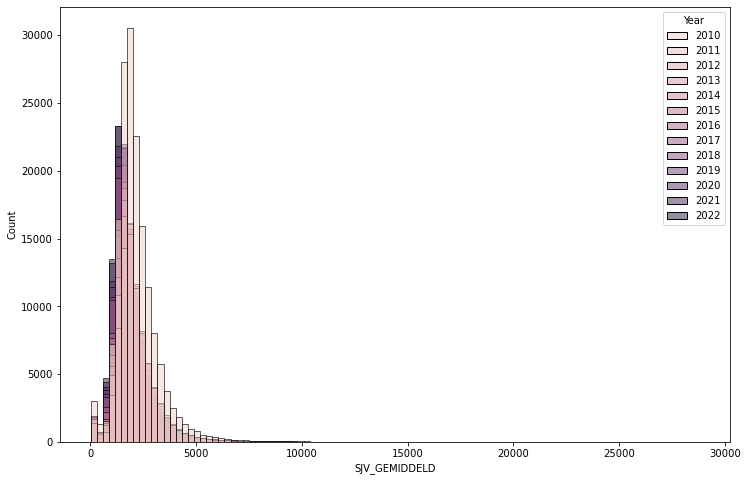

In [40]:
plt.figure(figsize = (12,8))
sns.histplot(data = dfg, x = 'SJV_GEMIDDELD', bins = 100, hue = 'Year')

(0.0, 10000.0)

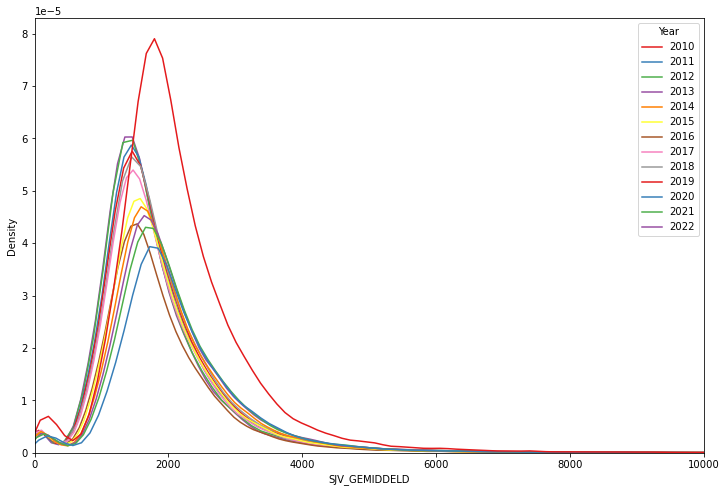

In [41]:
plt.figure(figsize = (12,8))
sns.kdeplot(data = dfg, x = 'SJV_GEMIDDELD', hue = 'Year', palette = 'Set1')
ax = plt.gca()
ax.set_xlim([0, 10000])

(0.0, 100.0)

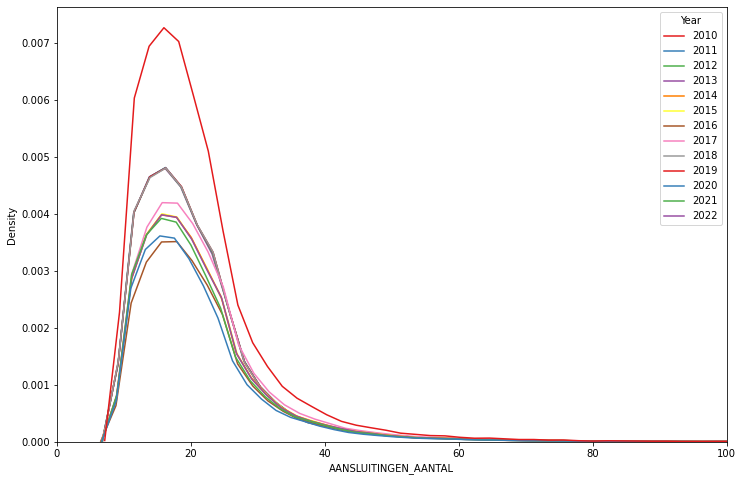

In [42]:
plt.figure(figsize = (12,8))
sns.kdeplot(data = dfg, x = 'AANSLUITINGEN_AANTAL', hue = 'Year', palette = 'Set1')
ax = plt.gca()
ax.set_xlim([0, 100])